<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/lab/sidpatel_autoencoder_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
from keras.datasets import mnist 

In [3]:
#runtime to GPU

In [4]:
len(mnist.load_data())

11501568/11490434 [==============================] - 0s 0us/step


2

In [5]:
(x_train, _), (x_test, _) = mnist.load_data() 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
nimg, img_row, img_col = x_train.shape

In [8]:
import pylab as pl

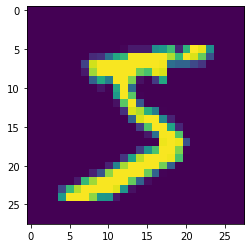

In [9]:
pl.imshow(x_train[0])

In [10]:
x_train.max()

255

In [11]:
x_train.dtype

dtype('uint8')

In [12]:
x_train = (x_train.astype(float) / 255)

In [13]:
x_test = (x_test.astype(float) / 255)

In [14]:
x_train = x_train.reshape(nimg, img_row*img_col)

In [15]:
x_test = x_test.reshape(x_test.shape[0], img_row*img_col)

In [16]:
y_train = x_train.copy()

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model_digits = Sequential()

In [19]:
model_digits.add(Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits.add(Dense(64, activation="relu"))
model_digits.add(Dense(128, activation="relu"))
model_digits.add(Dense(img_col*img_row, activation="linear"))



In [20]:
model_digits.compile(optimizer="adadelta", loss="mean_squared_error")

In [21]:
model_digits.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model_digits.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=60, batch_size=100, verbose=1)

Epoch 1/60
600/600 [==============================] - 4s 4ms/step - loss: 0.1191 - val_loss: 0.1206
Epoch 2/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1178 - val_loss: 0.1194
Epoch 3/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1168 - val_loss: 0.1185
Epoch 4/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1160 - val_loss: 0.1176
Epoch 5/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1152 - val_loss: 0.1169
Epoch 6/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1146 - val_loss: 0.1163
Epoch 7/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1140 - val_loss: 0.1157
Epoch 8/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1135 - val_loss: 0.1152
Epoch 9/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1130 - val_loss: 0.1147
Epoch 10/60
600/600 [==============================] - 2s 4ms/step - loss: 0.1126 - val_loss: 0.1143

In [27]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize=(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


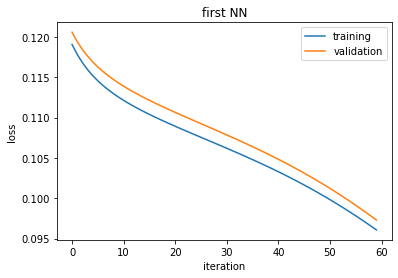

In [30]:
pl.plot(history.history["loss"], label = "training")
pl.plot(history.history["val_loss"], label = "validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title('first NN')
pl.legend()

In [31]:
output1 = model_digits.predict(x_test)

In [32]:
output1.shape

(10000, 784)

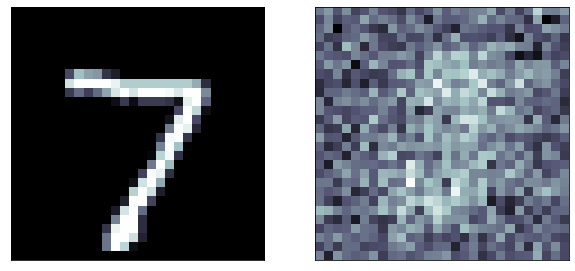

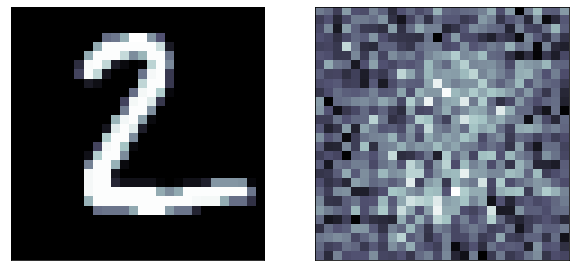

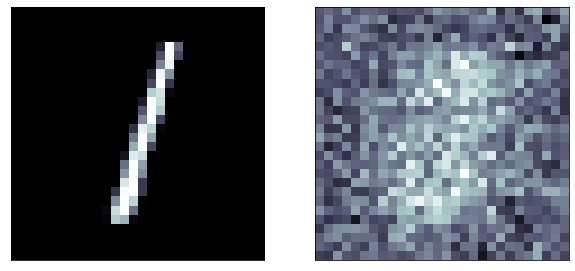

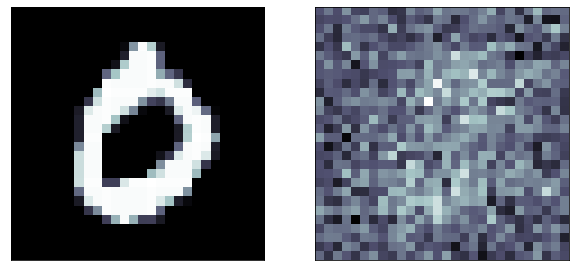

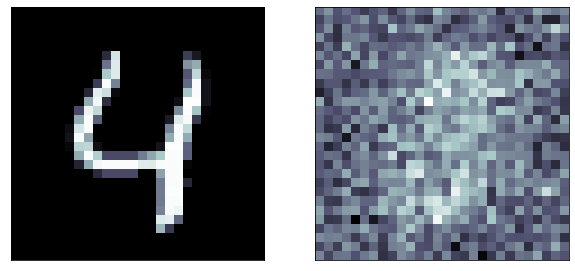

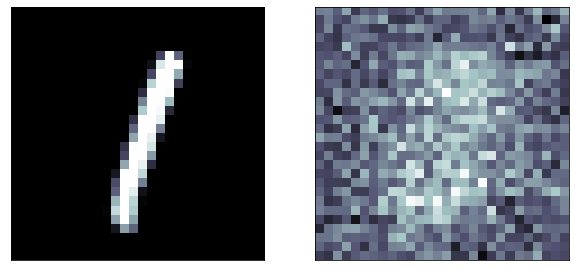

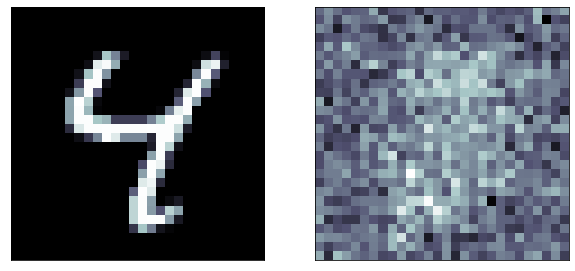

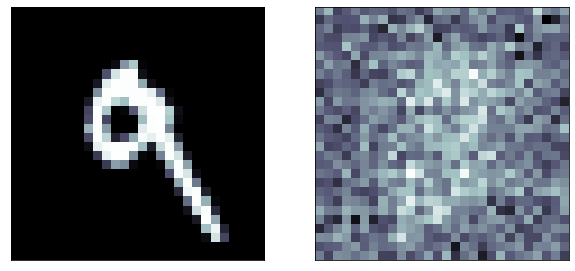

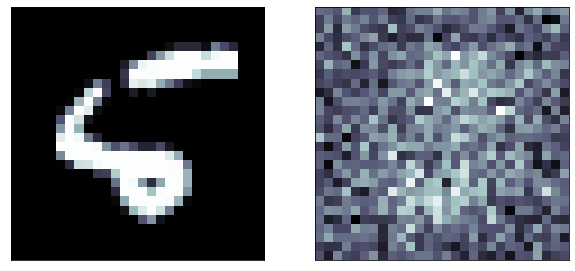

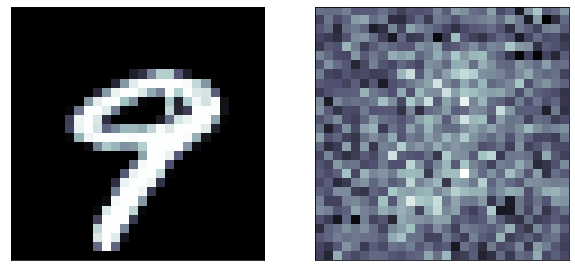

In [33]:
for i in range(10):
    compareinout(i, output1, x_test, initialshape=(28,28))

In [34]:
from keras.callbacks import EarlyStopping

In [41]:
patience = EarlyStopping(monitor="val_loss", min_delta=0.001, 
                         patience=5)

In [42]:
esModel = model_digits.fit(x_train, x_train, 
                           validation_data=(x_test,x_test), 
                           epochs=60, batch_size=100, verbose=1,
                            callbacks=[patience])

Epoch 1/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0927 - val_loss: 0.0938
Epoch 2/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0922 - val_loss: 0.0933
Epoch 3/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0917 - val_loss: 0.0928
Epoch 4/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0912 - val_loss: 0.0922
Epoch 5/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0907 - val_loss: 0.0917
Epoch 6/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0902 - val_loss: 0.0911
Epoch 7/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0896 - val_loss: 0.0906
Epoch 8/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0891 - val_loss: 0.0900
Epoch 9/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0886 - val_loss: 0.0895
Epoch 10/60
600/600 [==============================] - 2s 4ms/step - loss: 0.0880 - val_loss: 0.0889

In [43]:
output2 = model_digits.predict(x_test)

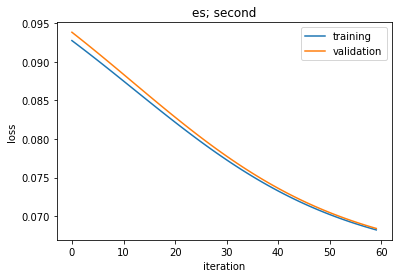

In [44]:
pl.plot(esModel.history['loss'], label="training")
pl.plot(esModel.history['val_loss'], label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title("es; second")
pl.legend()

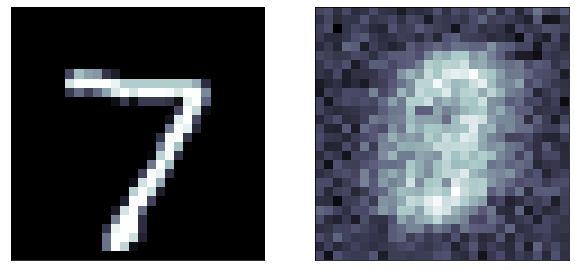

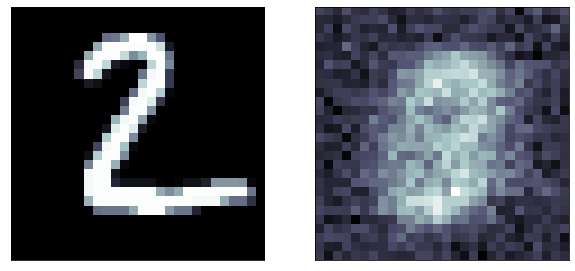

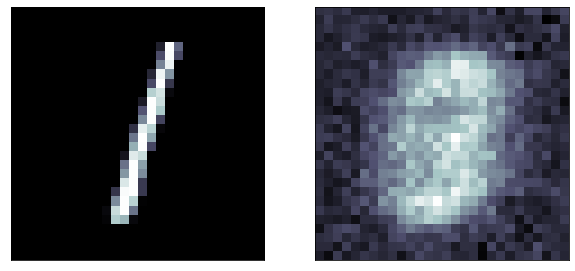

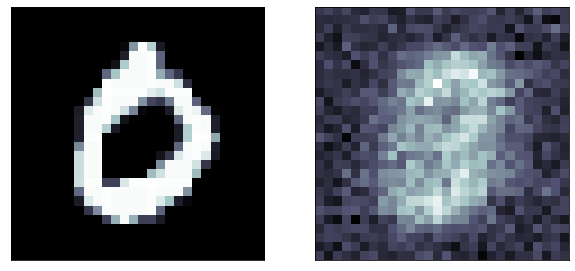

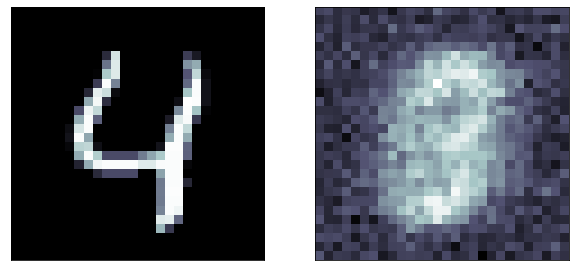

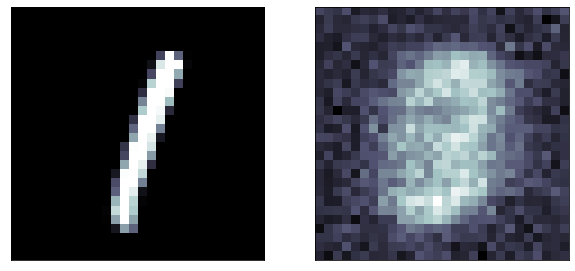

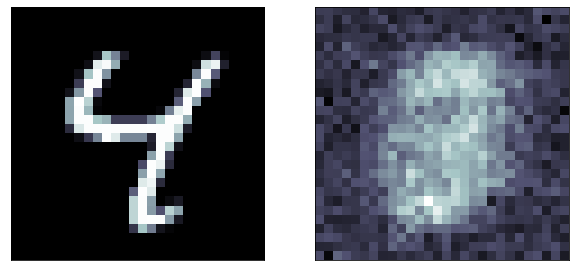

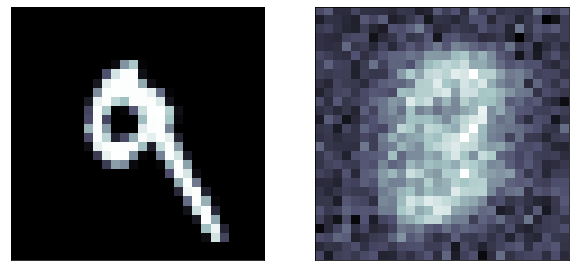

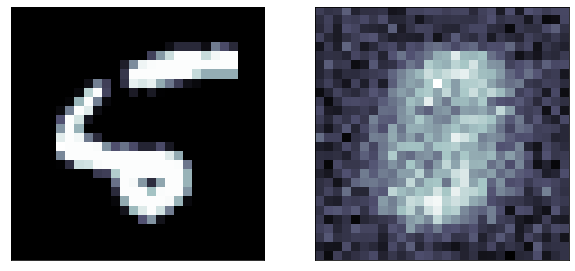

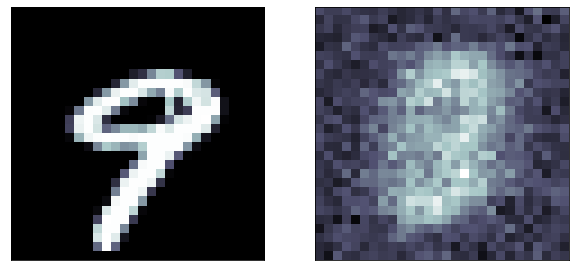

In [45]:
for i in range(10):
    compareinout(i, output2, x_test, initialshape=(28,28))

In [47]:
from tensorflow import keras
from keras import optimizers 

In [48]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model_digits.compile(loss="mean_squared_error",optimizer=opt)
patience2 = EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=5)
history2 = model_digits.fit(x_train, x_train,
                               validation_data=(x_test,x_test),
                               epochs=20, batch_size=100, verbose=1, callbacks=patience2)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0263 - val_loss: 0.0201
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0192 - val_loss: 0.0182
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0182 - val_loss: 0.0177
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0177 - val_loss: 0.0173
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0174 - val_loss: 0.0172
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0172 - val_loss: 0.0174
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0171 - val_loss: 0.0168
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0172 - val_loss: 0.0164
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0171 - val_loss: 0.0171

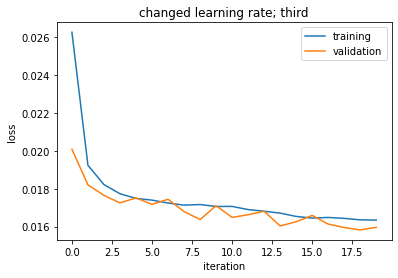

In [50]:
pl.plot(history2.history['loss'], label="training")
pl.plot(history2.history['val_loss'], label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title("changed learning rate; third")
pl.legend()

In [51]:
output3 = model_digits.predict(x_test)

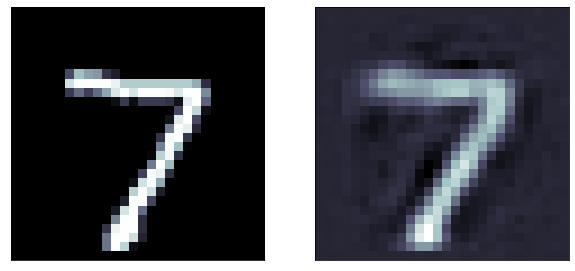

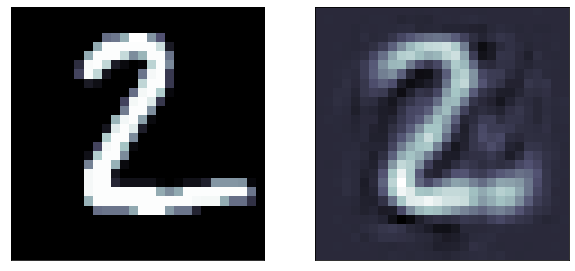

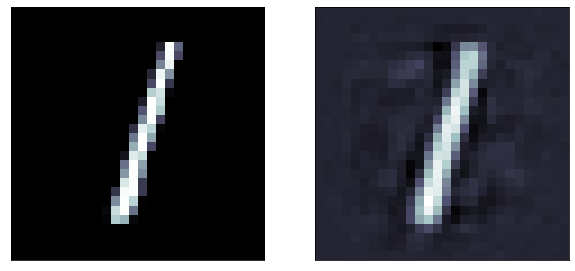

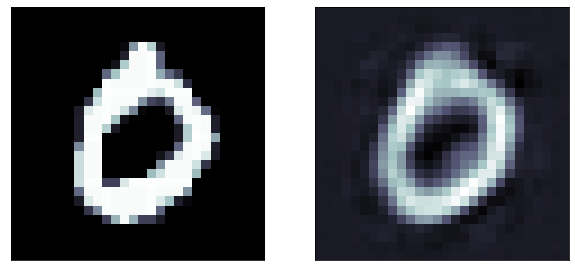

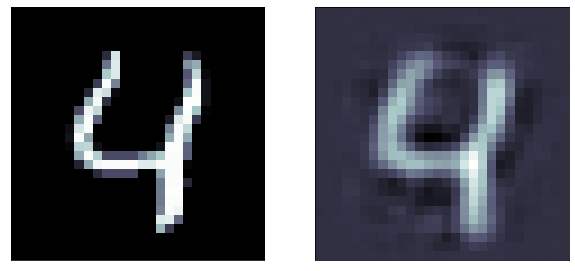

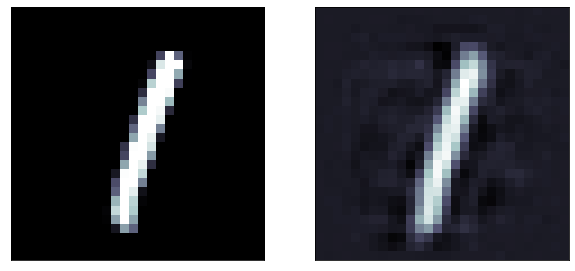

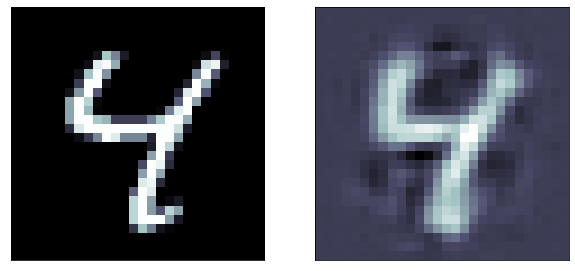

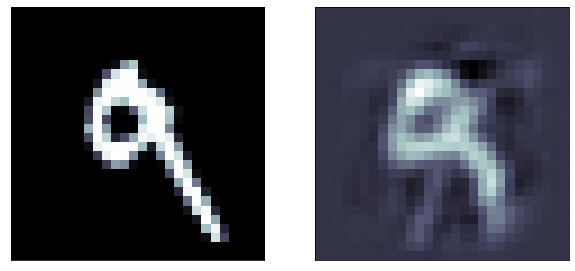

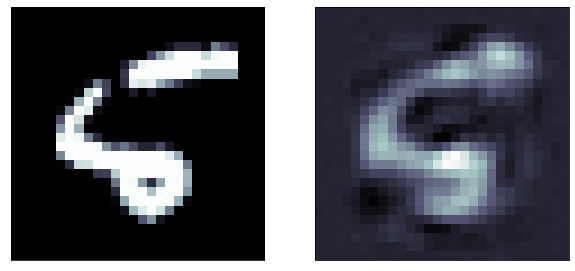

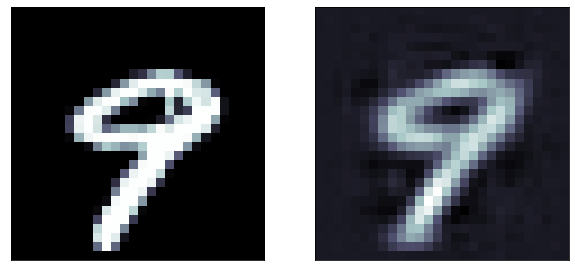

In [52]:
for i in range(10):
    compareinout(i, output3, x_test, initialshape=(28,28))

# change activation function to sigmoid from linear on last layer

In [54]:
model_digits_sig = Sequential()

model_digits_sig.add(Dense(128, activation="relu", input_dim=img_col*img_row))
model_digits_sig.add(Dense(64, activation="relu"))
model_digits_sig.add(Dense(128, activation="relu"))
model_digits_sig.add(Dense(img_col*img_row, activation="sigmoid"))




In [62]:
opt2 = keras.optimizers.Adam(learning_rate=0.001)

In [63]:
model_digits_sig.compile(optimizer=opt2, 
                         loss="mean_squared_error")

In [64]:
history3 = model_digits_sig.fit(x_train, x_train,
                               validation_data=(x_test,x_test), 
                               epochs=40, batch_size=100, verbose=1,
                                callbacks=[patience2])

Epoch 1/40
600/600 [==============================] - 3s 4ms/step - loss: 0.0366 - val_loss: 0.0170
Epoch 2/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0142 - val_loss: 0.0117
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 4/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0092 - val_loss: 0.0083
Epoch 5/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 6/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 7/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 8/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 10/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0060 - val_loss: 0.0058

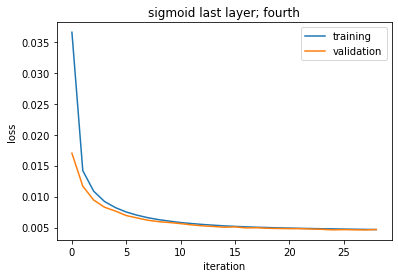

In [65]:
pl.plot(history3.history['loss'], label="training")
pl.plot(history3.history['val_loss'], label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.title("sigmoid last layer; fourth")
pl.legend()

In [66]:
output_sig = model_digits_sig.predict(x_test)

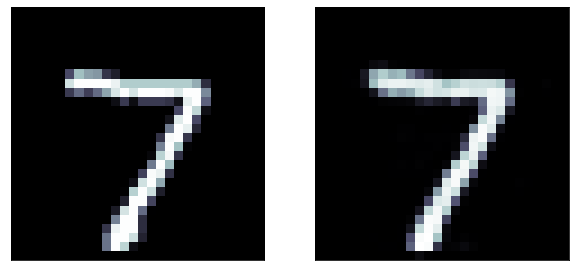

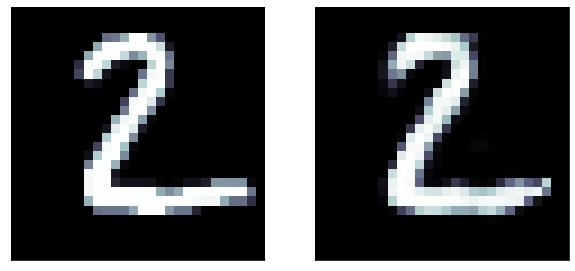

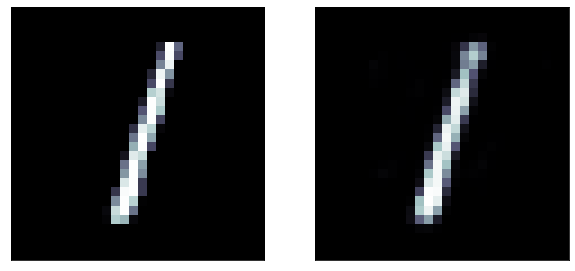

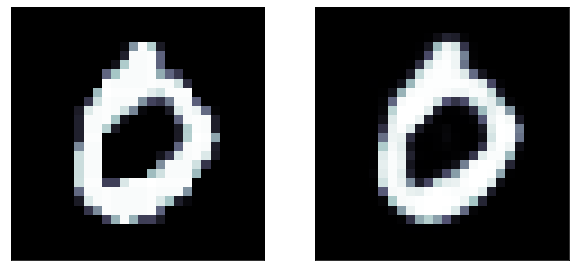

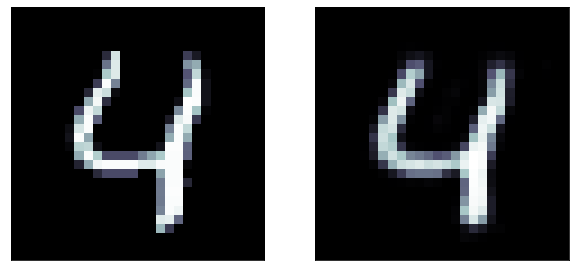

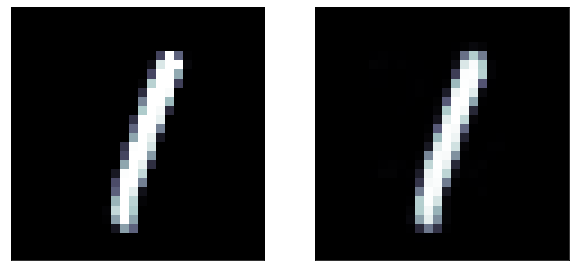

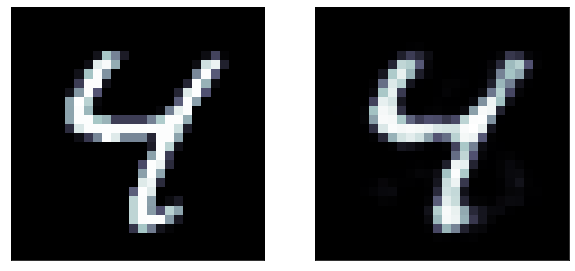

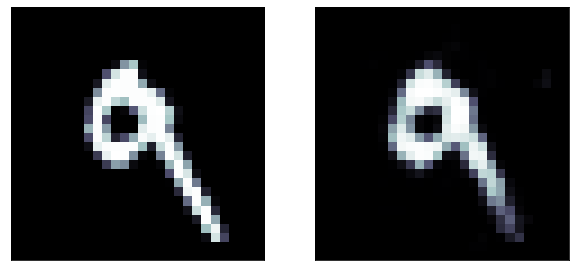

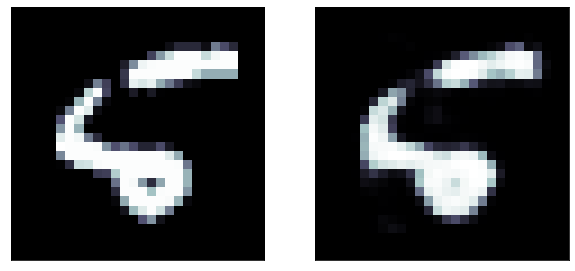

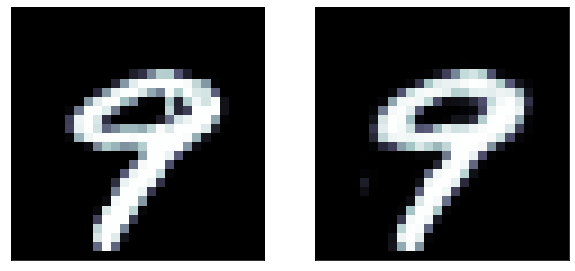

In [67]:
for i in range(10):
    compareinout(i, output_sig, x_test, initialshape=(28,28))